In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np 
import pandas as pd 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
from sklearn.utils import shuffle 
from collections import Counter 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
import keras
from keras.utils import to_categorical
import os
from keras.layers import *
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from keras.models import Sequential, Model
from keras import optimizers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def parse_arff(filename):
	try:
		file = open(filename)
	except:
		print('file could not found or opened, try with file location')
	columns = []
	data = []

	for line in file:
		if line.startswith('@attribute'):
			line = line.strip()
			temp = line.split()
			columns.append(temp[1])
		elif line.startswith('@') or line.startswith('\n'):
			continue
		else:
			line = line.strip()
			temp = line.split(',')
			data.append(temp)

	return data,columns

In [ ]:
data, columns = parse_arff('drive/MyDrive/content/Training Dataset.arff')
df = pd.DataFrame(data, columns = columns, dtype=np.int8)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df[df.columns[:-1]],df[df.columns[-1]], test_size = 0.3)

In [ ]:
x_train = np.array(x_train).astype(np.int8)
y_train = np.array(y_train).astype(np.int8)
x_test = np.array(x_test).astype(np.int8)
y_test = np.array(y_test).astype(np.int8)
y_train = np.where(y_train == -1, 0, y_train)
y_test = np.where(y_test == -1, 0, y_test)

In [ ]:
address_bar = ['having_IP_Address', 'URL_Length', 'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Result']
df_address_bar = df[address_bar]
x_train_address_bar, x_test_address_bar, y_train_address_bar, y_test_address_bar = train_test_split(df_address_bar[df_address_bar.columns[:-1]],df_address_bar[df_address_bar.columns[-1]], test_size = 0.3)

In [ ]:
abnormality = ['Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL', 'Result']
df_abnormality = df[abnormality]
x_train_abnormality, x_test_abnormality, y_train_abnormality, y_test_abnormality = train_test_split(df_abnormality[df_abnormality.columns[:-1]],df_abnormality[df_abnormality.columns[-1]], test_size = 0.3)

In [ ]:
HTML_JavaScript = ['Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe', 'Result']
df_HTML_JavaScript = df[HTML_JavaScript]
x_train_HTML_JavaScript, x_test_HTML_JavaScript, y_train_HTML_JavaScript, y_test_HTML_JavaScript = train_test_split(df_HTML_JavaScript[df_HTML_JavaScript.columns[:-1]],df_HTML_JavaScript[df_HTML_JavaScript.columns[-1]], test_size = 0.3)

In [ ]:
domain_features = ['age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page', 'Statistical_report', 'Result']
df_domain = df[domain_features]
x_train_domain, x_test_domain, y_train_domain, y_test_domain = train_test_split(df_domain[df_domain.columns[:-1]],df_domain[df_domain.columns[-1]], test_size = 0.3)

In [ ]:
#address bar features
model = BernoulliNB(0, 0, True).fit(x_train_address_bar, y_train_address_bar)
print(accuracy_score(y_test_address_bar, model.predict(x_test_address_bar)))
#abnormality
model = BernoulliNB(0, 0, True).fit(x_train_abnormality, y_train_abnormality)
print(accuracy_score(y_test_abnormality, model.predict(x_test_abnormality)))
#HTML JavaScript
model = BernoulliNB(0, 0, True).fit(x_train_HTML_JavaScript, y_train_HTML_JavaScript)
print(accuracy_score(y_test_HTML_JavaScript, model.predict(x_test_HTML_JavaScript)))
#Domain Features
model = BernoulliNB(0, 0, True).fit(x_train_domain, y_train_domain)
print(accuracy_score(y_test_domain, model.predict(x_test_domain)))

0.895990352728369
0.7220379861320471
0.5601447090744649
0.6988242387699729


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


In [ ]:
max_features = [None, 'auto', 'sqrt', 'log2']
criterion = ['gini', 'entropy']
splitter = ['best', 'random']
bootstrap  = [True, False]
class_weight = [None, 'balanced', 'balanced_subsample']
warm_start = [True, False]

In [ ]:
#address bar features
model = RandomForestClassifier(class_weight = None, max_features = 'auto', criterion='entropy',warm_start= False).fit(x_train_address_bar, y_train_address_bar)
print(accuracy_score(y_test_address_bar, model.predict(x_test_address_bar)))
#abnormality
model = RandomForestClassifier(class_weight = None, max_features = 'auto', criterion='entropy',warm_start= False).fit(x_train_abnormality, y_train_abnormality)
print(accuracy_score(y_test_abnormality, model.predict(x_test_abnormality)))
#HTML JavaScript
model = RandomForestClassifier(class_weight = None, max_features = 'auto', criterion='entropy',warm_start= False).fit(x_train_HTML_JavaScript, y_train_HTML_JavaScript)
print(accuracy_score(y_test_HTML_JavaScript, model.predict(x_test_HTML_JavaScript)))
#Domain Features
model = RandomForestClassifier(class_weight = None, max_features = 'auto', criterion='entropy',warm_start= False).fit(x_train_domain, y_train_domain)
print(accuracy_score(y_test_domain, model.predict(x_test_domain)))

0.9047331926439554
0.8763943322279167
0.5743141392824842
0.7283690081398855


In [ ]:
#address bar features
model = DecisionTreeClassifier(max_features = None, criterion = 'entropy', splitter = 'random').fit(x_train_address_bar, y_train_address_bar)
print(accuracy_score(y_test_address_bar, model.predict(x_test_address_bar)))
#abnormality
model = DecisionTreeClassifier(max_features = None, criterion = 'entropy', splitter = 'random').fit(x_train_abnormality, y_train_abnormality)
print(accuracy_score(y_test_abnormality, model.predict(x_test_abnormality)))
#HTML JavaScript
model = DecisionTreeClassifier(max_features = None, criterion = 'entropy', splitter = 'random').fit(x_train_HTML_JavaScript, y_train_HTML_JavaScript)
print(accuracy_score(y_test_HTML_JavaScript, model.predict(x_test_HTML_JavaScript)))
#Domain Features
model = DecisionTreeClassifier(max_features = None, criterion = 'entropy', splitter = 'random').fit(x_train_domain, y_train_domain)
print(accuracy_score(y_test_domain, model.predict(x_test_domain)))

0.9032258064516129
0.8763943322279167
0.5743141392824842
0.7274645764244799


In [ ]:
nn_features = ['having_IP_Address', 'URL_Length','having_At_Symbol','Prefix_Suffix','Abnormal_URL','SFH','HTTPS_token','Iframe', 'RightClick', 'popUpWidnow', 'having_Sub_Domain', 'Request_URL', 'URL_of_Anchor','Redirect','age_of_domain', 'DNSRecord', 'web_traffic', 'Result']
df_nn = df[nn_features]
x_train, x_test, y_train, y_test = train_test_split(df_nn[df_nn.columns[:-1]],df_nn[df_nn.columns[-1]], test_size = 0.3)
x_train = np.array(x_train).astype(np.int8)
y_train = np.array(y_train).astype(np.int8)
x_test = np.array(x_test).astype(np.int8)
y_test = np.array(y_test).astype(np.int8)
y_train = np.where(y_train == -1, 0, y_train)
y_test = np.where(y_test == -1, 0, y_test)

In [ ]:
epochs = [50, 100, 200, 500, 1000]
train_acc = []
val_acc = []
for epoch in epochs:
  model = keras.Sequential()
  model.add(Flatten(input_shape = (17,)))
  model.add(Dense(17, kernel_regularizer=l2(0.0001), activation='sigmoid'))
  model.add(Dense(3, activation='sigmoid'))
  model.add(Dense(1,activation='sigmoid'))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
  modelhistory = model.fit(x_train, y_train, epochs = epoch, validation_data=(x_test, y_test))
  train_acc.append('epoch = ' + str(epoch) + ' train acc ' + str(max(modelhistory.history['accuracy'])))
  val_acc.append('epoch = ' + str(epoch) + ' train acc ' + str(max(modelhistory.history['accuracy'])))

In [ ]:
train_acc

['epoch = 50 train acc 0.5609976649284363',
 'epoch = 100 train acc 0.8752907514572144',
 'epoch = 200 train acc 0.8907986283302307',
 'epoch = 500 train acc 0.9090204238891602',
 'epoch = 1000 train acc 0.9272421598434448']

In [ ]:
val_acc

['epoch = 50 train acc 0.5609976649284363',
 'epoch = 100 train acc 0.8752907514572144',
 'epoch = 200 train acc 0.8907986283302307',
 'epoch = 500 train acc 0.9090204238891602',
 'epoch = 1000 train acc 0.9272421598434448']

In [ ]:
model = keras.Sequential()
model.add(Flatten(input_shape = (17,)))
model.add(Dense(32, kernel_regularizer=l2(0.0001), activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(32,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
modelhistory = model.fit(x_train, y_train, epochs = 1000, validation_data=(x_test, y_test))

In [ ]:
print('epoch = ' + str(epoch) + ' train acc ' + str(max(modelhistory.history['accuracy'])))
print('epoch = ' + str(epoch) + ' train acc ' + str(max(modelhistory.history['accuracy'])))

epoch = 1000 train acc 0.9293099045753479
epoch = 1000 train acc 0.9293099045753479


In [ ]:
x_train_cat = to_categorical(x_train)
x_test_cat = to_categorical(x_test)
x_train_cat.shape

(7738, 17, 2)

In [ ]:
model = keras.Sequential()
model.add(Flatten(input_shape = (17,2)))
model.add(Dense(32, kernel_regularizer=l2(0.0001), activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(32,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
modelhistory = model.fit(x_train_cat, y_train, epochs = 1000, validation_data=(x_test_cat, y_test))

Epoch 1/1000
242/242 [==============================] - 2s 4ms/step - loss: 0.6924 - accuracy: 0.5579 - val_loss: 0.6894 - val_accuracy: 0.5659
Epoch 2/1000
242/242 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.5516 - val_loss: 0.6880 - val_accuracy: 0.5659
Epoch 3/1000
242/242 [==============================] - 1s 2ms/step - loss: 0.6911 - accuracy: 0.5511 - val_loss: 0.6874 - val_accuracy: 0.5659
Epoch 4/1000
242/242 [==============================] - 1s 3ms/step - loss: 0.6904 - accuracy: 0.5554 - val_loss: 0.6885 - val_accuracy: 0.5659
Epoch 5/1000
242/242 [==============================] - 1s 2ms/step - loss: 0.6902 - accuracy: 0.5560 - val_loss: 0.6878 - val_accuracy: 0.5659
Epoch 6/1000
242/242 [==============================] - 1s 2ms/step - loss: 0.6907 - accuracy: 0.5521 - val_loss: 0.6875 - val_accuracy: 0.5659
Epoch 7/1000
242/242 [==============================] - 1s 2ms/step - loss: 0.6883 - accuracy: 0.5632 - val_loss: 0.6885 - val_accuracy:

In [ ]:
print('epoch = ' + str(epoch) + ' train acc ' + str(max(modelhistory.history['accuracy'])))
print('epoch = ' + str(epoch) + ' train acc ' + str(max(modelhistory.history['accuracy'])))

epoch = 1000 train acc 0.9275006651878357
epoch = 1000 train acc 0.9275006651878357


In [ ]:
x_trainn = x_train.reshape((x_train.shape[0],1, 10, 3))
x_testt = x_test.reshape((x_test.shape[0],1, 10, 3))
y_trainn = np.asarray(y_train).reshape((-1,1))
y_testt = np.asarray(y_test).reshape((-1,1))

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(10, (1,1), activation='relu', input_shape=(1,10,3)))
model.add(keras.layers.Conv2D(20, (1,2), activation='relu'))
model.add(keras.layers.MaxPool2D(1,1))
model.add(keras.layers.ReLU())
model.add(keras.layers.Dense(250,activation='relu'))
model.add(keras.layers.ReLU())
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(250,activation='relu'))
model.add(Flatten())
model.add(keras.layers.Dense(1,activation='softmax'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
modelhistory = model.fit(x_trainn, y_trainn, epochs = 500, validation_data=(x_testt, y_testt))
#0.55

In [ ]:
weights = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
metric = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']

In [ ]:
#k-NearestNeighbours Number of neighbours: 5; Weights: uniform weights  Algorithm: auto;
model = KNeighborsClassifier(n_neighbors=5, weights = weights[0], algorithm = algorithm[0]).fit(x_train, y_train)
print(accuracy_score(y_test, model.predict(x_test)))

0.9372927343985529


In [ ]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
C = [1, 2, 3, 4, 5] # regularization parameter
degree = [1, 2, 3, 4, 5, 6] # polinomial degree
gamma = ['scale', 'auto']
decision_function_shape = ['ovo', 'ovr']
#SVC

In [ ]:
model = SVC(kernel = kernels[0], C = C[0]).fit(x_train, y_train)
print(accuracy_score(y_test, model.predict(x_test)))

model = SVC(kernel = kernels[1], degree = degree[0], C = C[0]).fit(x_train, y_train)
print(accuracy_score(y_test, model.predict(x_test)))

model = SVC(kernel = kernels[1], degree = degree[1], C = C[0]).fit(x_train, y_train)
print(accuracy_score(y_test, model.predict(x_test)))

0.9267410310521556
0.9258365993367501
0.9421163702140488


In [ ]:
model = RandomForestClassifier(criterion='entropy', n_estimators=7, max_depth=11).fit(x_train, y_train)
print(accuracy_score(y_test, model.predict(x_test)))

model = RandomForestClassifier(criterion='entropy', n_estimators=7, max_depth=11).fit(x_train, y_train)
print(accuracy_score(y_test, model.predict(x_test)))

0.9517636418450407
0.9538739825143202


In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(30,),max_iter=3000).fit(x_train, y_train)
print(accuracy_score(y_test, model.predict(x_test)))

model = MLPClassifier(hidden_layer_sizes=(150,),max_iter=1000).fit(x_train, y_train)
print(accuracy_score(y_test, model.predict(x_test)))

model = MLPClassifier(hidden_layer_sizes=(100,),max_iter=1000).fit(x_train, y_train)
print(accuracy_score(y_test, model.predict(x_test)))

0.9541754597527886
0.9698522761531504
0.9704552306300874


In [ ]:
#poly, 5, 6, scale, ovo svc
svc = SVC(kernel='poly', C = 5, degree=6, gamma='scale', decision_function_shape='ovo').fit(x_train, y_train)
#5, distance, auto, manhattan knn
knn = KNeighborsClassifier(n_neighbors=5, weights = 'distance', algorithm = 'auto', metric='manhattan').fit(x_train, y_train)
#None, None, entropy, random dtree
dtree = DecisionTreeClassifier(max_features = None, criterion = 'entropy', splitter = 'random').fit(x_train, y_train)
#0, 0, false bnb
bnb = BernoulliNB(0, 0, False).fit(x_train, y_train)
#None, log2, entropy, false random
random = RandomForestClassifier(class_weight = None, max_features = 'log2', criterion='entropy',warm_start= False).fit(x_train, y_train)

In [ ]:
voting_classifier = [svc, knn, dtree, bnb, random]
predictions = []
for clf in voting_classifier:
  predictions.append(clf.predict(x_test))

In [ ]:
votes = []
for a, b, c, d, e, f in zip(predictions[0], predictions[1], predictions[2], predictions[3], predictions[4], model.predict(x_test)):
  if ( (a+b+c+d+e+f) > 2):
    votes.append(1)
  else:
    votes.append(0)

accuracy_score(y_test, votes)

0.968947844437745

In [ ]:
model = keras.Sequential()
model.add(keras.layers.LSTM(128, activation='relu',return_sequences=True, input_shape=(1,30)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(256, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(250,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
x = x_train.reshape((x_train.shape[0], 1, 30))
xx = x_test.reshape((x_test.shape[0], 1, 30))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
modelhistory = model.fit(x, y_train, epochs = 250, validation_data=(xx, y_test))

In [ ]:
train_loss = modelhistory.history['loss']
train_accuracy = modelhistory.history['accuracy']
val_loss = modelhistory.history['loss']
val_accuracy = modelhistory.history['accuracy']

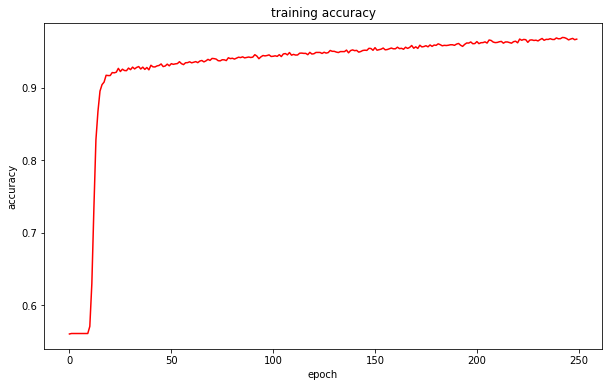

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(train_accuracy,'r',label='training accuracy')
plt.title('training accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

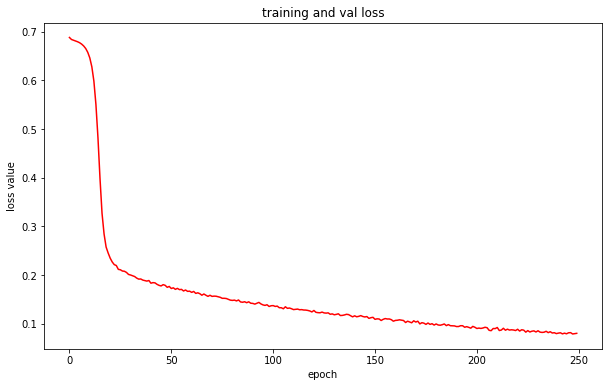

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(train_loss,'r',label='training loss')
plt.title('training and val loss')
plt.xlabel('epoch')
plt.ylabel('loss value')
plt.show()

In [ ]:
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(64, activation='relu', return_sequences=True, input_shape=(1,30)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.SimpleRNN(128, activation='relu', input_shape=(1,30)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
modelhist = model.fit(x, y_train, epochs = 75, validation_data=(xx, y_test))

In [ ]:
train_loss = modelhist.history['loss']
train_accuracy = modelhist.history['accuracy']
val_loss = modelhist.history['loss']
val_accuracy = modelhist.history['accuracy']

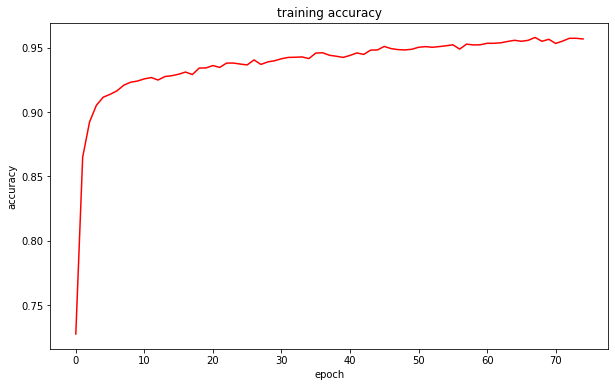

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(train_accuracy,'r',label='training accuracy')
plt.title('training accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

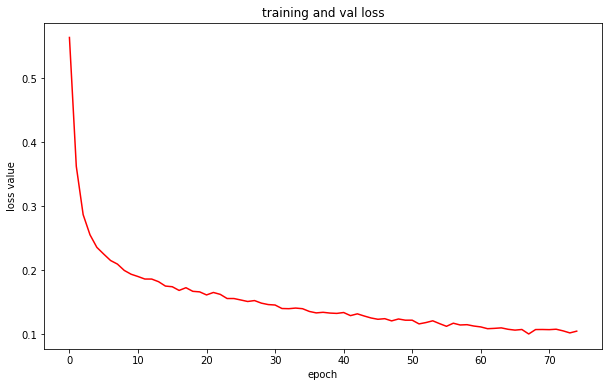

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(train_loss,'r',label='training loss')
plt.title('training and val loss')
plt.xlabel('epoch')
plt.ylabel('loss value')
plt.show()

In [ ]:
model = keras.Sequential()
model.add(keras.layers.GRU(64, return_sequences=True, input_shape=(1,30)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.SimpleRNN(128, activation='relu', input_shape=(1,30)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
history = model.fit(x, y_train, epochs = 75, validation_data=(xx, y_test))

In [ ]:
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['loss']
val_accuracy = history.history['accuracy']

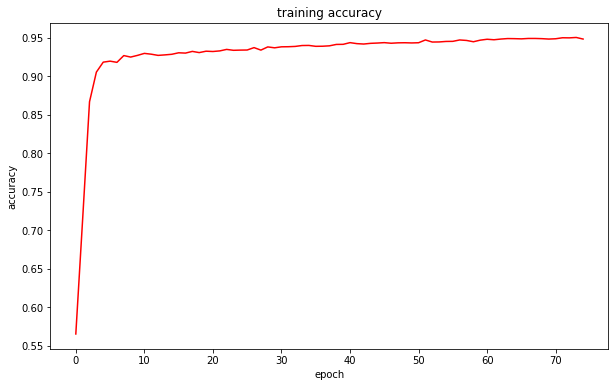

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(train_accuracy,'r',label='training accuracy')
plt.title('training accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

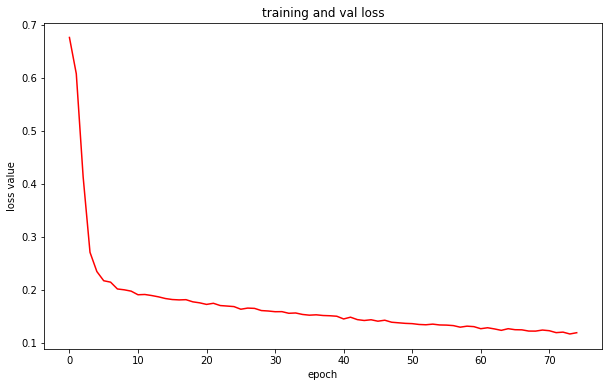

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(train_loss,'r',label='training loss')
plt.title('training and val loss')
plt.xlabel('epoch')
plt.ylabel('loss value')
plt.show()